In [97]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,recall_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [98]:
data = pd.read_csv('framingham.csv')
data.head(20)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [99]:
""" data.drop(['education','currentSmoker'], axis=1, inplace=True) """

" data.drop(['education','currentSmoker'], axis=1, inplace=True) "

In [100]:
data.shape

(4238, 16)

In [101]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [102]:
for i in range(len(data.columns)-1):
    data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mean())

In [103]:
for i in range(len(data.columns)-1):
    if  i > 8:
        q1 = data[data.columns[i]].quantile(0.25)
        q3 = data[data.columns[i]].quantile(0.75)
        iqr = q3 - q1
        lower_bound_gc = q1 - iqr*1.5
        upper_bound_gc = q3 + 1.5*iqr
        data = data[(data[data.columns[i]] >= lower_bound_gc) & (data[data.columns[i]] <= upper_bound_gc)]


In [104]:
data.shape

(3640, 16)

In [105]:
corr_data_matrix =data.corr()
corr_data_matrix

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,0.001189,0.000079,0.194115,0.312222,-0.042177,0.016315,0.048013,0.004819,-0.044565,0.025181,0.109767,0.156411,-0.115553,-0.012315,0.100589
age,0.001189,1.000000,-0.144910,-0.202511,-0.175631,0.096339,0.044589,0.274645,0.017288,0.273947,0.370937,0.177588,0.132062,-0.041118,0.074451,0.213672
education,0.000079,-0.144910,1.000000,0.002925,-0.004575,0.007561,-0.024172,-0.063369,0.010374,-0.027135,-0.120819,-0.048403,-0.111236,-0.045726,0.002310,-0.044351
currentSmoker,0.194115,-0.202511,0.002925,1.000000,0.766120,-0.047877,-0.016247,-0.076734,-0.012035,-0.044901,-0.108911,-0.096004,-0.164876,0.076536,-0.065879,0.032374
cigsPerDay,0.312222,-0.175631,-0.004575,0.766120,1.000000,-0.043430,-0.022195,-0.036439,-0.010911,-0.012530,-0.055948,-0.035282,-0.072541,0.085695,-0.071477,0.067018
BPMeds,-0.042177,0.096339,0.007561,-0.047877,-0.043430,1.000000,0.100686,0.242055,0.016402,0.035519,0.184119,0.138637,0.067382,-0.019128,-0.020821,0.047179
prevalentStroke,0.016315,0.044589,-0.024172,-0.016247,-0.022195,0.100686,1.000000,0.073691,-0.005107,-0.004594,0.062002,0.050646,-0.001298,-0.006507,-0.005998,0.064669
prevalentHyp,0.048013,0.274645,-0.063369,-0.076734,-0.036439,0.242055,0.073691,1.000000,0.034796,0.145682,0.686872,0.594829,0.252298,0.107703,0.038229,0.141651
diabetes,0.004819,0.017288,0.010374,-0.012035,-0.010911,0.016402,-0.005107,0.034796,1.000000,0.018471,0.035029,0.021524,-0.002630,0.005095,0.005226,0.005318
totChol,-0.044565,0.273947,-0.027135,-0.044901,-0.012530,0.035519,-0.004594,0.145682,0.018471,1.000000,0.200008,0.184428,0.157477,0.080119,0.005214,0.067272


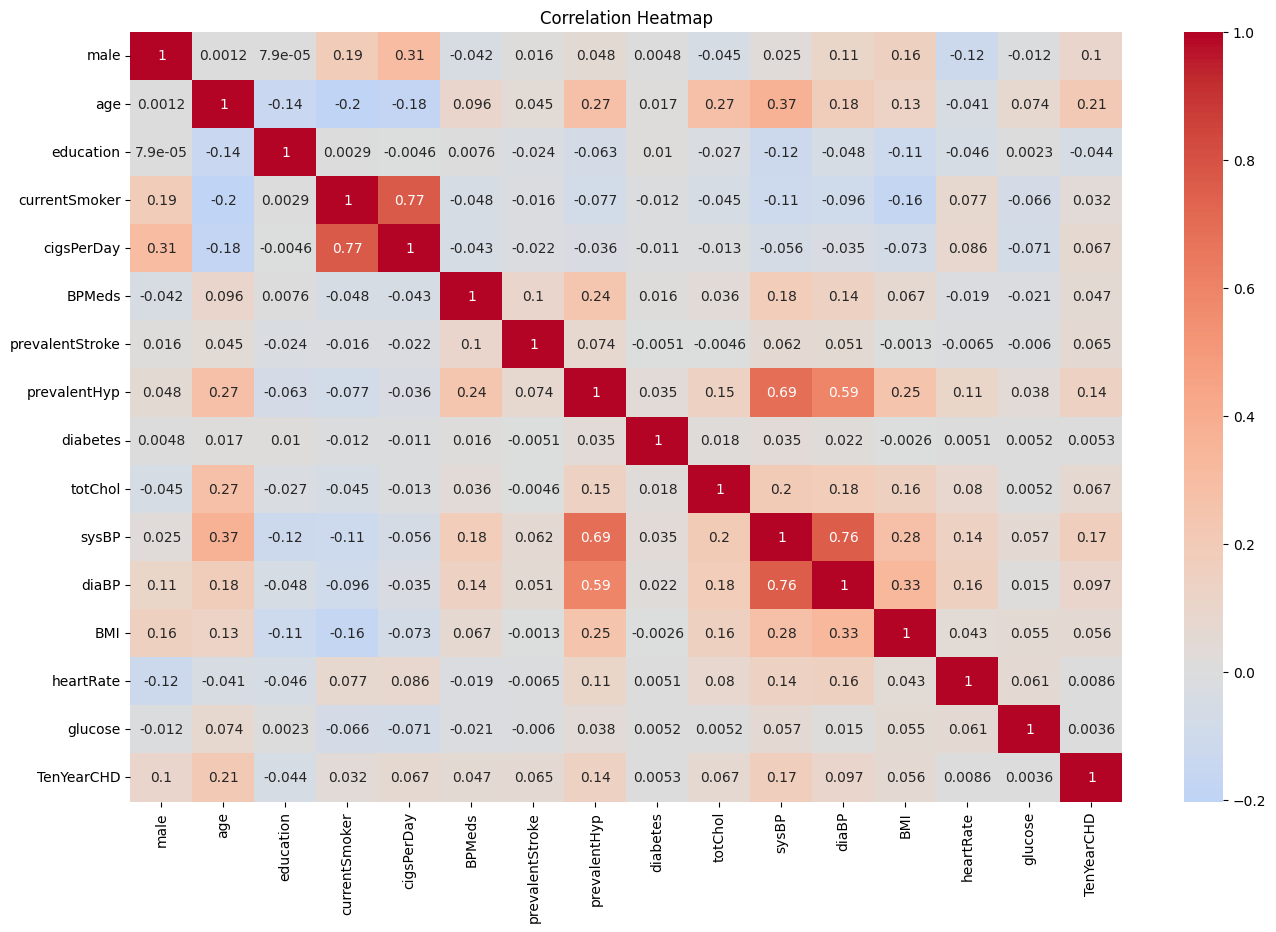

In [106]:
# Create a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_data_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [107]:
y = data['TenYearCHD']
X = data.drop('TenYearCHD', axis=1)


In [108]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
np.save('x_train.npy', x_train)

In [110]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
feature_names = data.columns.tolist()

In [111]:
x_test_scaled

array([[ 1.12288448e+00, -5.85912014e-01, -1.56832874e-03, ...,
         1.06722099e+00,  1.32794817e+00,  2.20181509e+00],
       [ 1.12288448e+00, -1.41312011e+00, -1.56832874e-03, ...,
        -7.64596534e-01, -1.73585599e+00, -2.17260003e-01],
       [-8.90563557e-01, -1.17677494e+00, -1.56832874e-03, ...,
         2.72281309e-01,  1.23510562e+00, -3.18054798e-01],
       ...,
       [-8.90563557e-01,  7.13986423e-01, -9.92085780e-01, ...,
        -1.71218767e+00,  3.99522664e-01, -3.18054798e-01],
       [ 1.12288448e+00,  4.77641252e-01, -9.92085780e-01, ...,
         3.78849310e-01,  2.81524628e-02, -3.18054798e-01],
       [-8.90563557e-01, -7.04084599e-01, -1.56832874e-03, ...,
        -1.03533686e+00, -4.36060288e-01, -6.20439185e-01]])

In [42]:
# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim=x_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model


In [43]:
model.fit(x_train_scaled, y_train, epochs=50, batch_size=32)

Epoch 1/50
91/91 [==============================] - 1s 2ms/step - loss: 0.4499 - accuracy: 0.8269
Epoch 2/50
91/91 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8650
Epoch 3/50
91/91 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8661
Epoch 4/50
91/91 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.8668
Epoch 5/50
91/91 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8671
Epoch 6/50
91/91 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.8674
Epoch 7/50
91/91 [==============================] - 0s 3ms/step - loss: 0.3481 - accuracy: 0.8671
Epoch 8/50
91/91 [==============================] - 0s 2ms/step - loss: 0.3447 - accuracy: 0.8702
Epoch 9/50
91/91 [==============================] - 0s 3ms/step - loss: 0.3427 - accuracy: 0.8681
Epoch 10/50
91/91 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.8702
Epoch 11/50
91/91 [

In [113]:
y_pred_prob = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("recall:", recall_score(y_test, y_pred))

Accuracy: 0.8791208791208791
recall: 0.05434782608695652


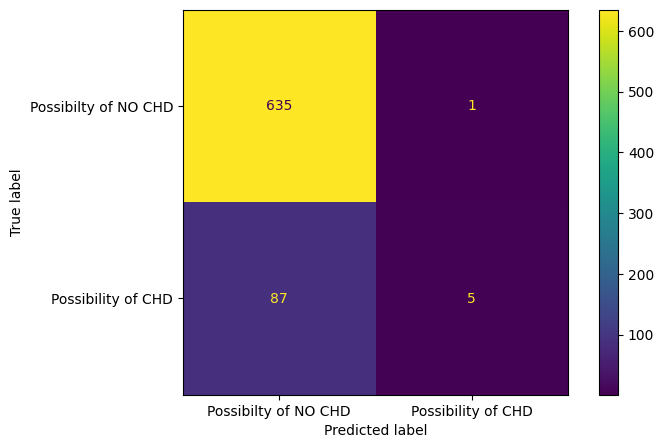

In [114]:
fig, ax = plt.subplots(figsize = (8,5))
cmp = ConfusionMatrixDisplay(
confusion_matrix(y_test, y_pred), display_labels = ['Possibilty of NO CHD', 'Possibility of CHD'], 
)
cmp.plot(ax=ax);


In [46]:
model.save("my_model.h5")

In [47]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model("my_model.h5")




In [48]:
y_pred = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("recall:", recall_score(y_test, y_pred))

23/23 [==============================] - 0s 1ms/step
Accuracy: 0.8626373626373627
recall: 0.10869565217391304


In [72]:
y_pred = model.predict(x_test_scaled[0:30])
print(y_pred)

1/1 [==============================] - 0s 40ms/step
[[0.57561237]
 [0.01357565]
 [0.01344073]
 [0.27823335]
 [0.04389267]
 [0.05794502]
 [0.2799841 ]
 [0.00446718]
 [0.00754656]
 [0.10669386]
 [0.00879814]
 [0.0660958 ]
 [0.01143404]
 [0.14243725]
 [0.02514041]
 [0.12138706]
 [0.15358213]
 [0.04371615]
 [0.29961655]
 [0.21353821]
 [0.07146163]
 [0.00505297]
 [0.03422005]
 [0.00859781]
 [0.36180317]
 [0.0369865 ]
 [0.03115973]
 [0.0303575 ]
 [0.17758088]
 [0.03100497]]


In [77]:
from keras.models import load_model

model = load_model("my_model.h5")

y_pred = model.predict(x_test_scaled[0:1])
print(y_pred)

1/1 [==============================] - 0s 75ms/step
[[0.57561255]]


In [115]:
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import StandardScaler

# Load the saved model
loaded_model = load_model('my_model.h5')

# Prepare new data as a list (example data)
new_data_list = [1, 20, 2.0, 1, 15, 0.0, 0, 1, 0, 220.0, 130.0, 80.0, 25.0, 70.0, 85.0]

# Convert the list to a NumPy array
new_data_array = np.array(new_data_list).reshape(1, -1)  # Reshape to match the input shape

# Create a scaler and fit it on the training data
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(x_train)  # Replace 'training_data' with your actual training data

# Standardize the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data_array)

# Print the scaled data for debugging
print("Scaled Data:", new_data_scaled)

# Make predictions on the new data
predictions = loaded_model.predict(new_data_scaled)

# Print intermediate predictions for debugging
print("Intermediate Predictions:", predictions)

# Print the final predicted probability
print("Predicted Probability of TenYearCHD:", predictions[0][0])


Scaled Data: [[ 1.12288448e+00 -3.42205406e+00 -1.56832874e-03  9.99313423e-01
   4.65889455e-01 -1.49693806e-01 -6.43267521e-02  1.68723547e+00
  -6.15775603e-02 -3.51628457e-01  6.27688206e-02 -1.44211813e-01
  -1.28068747e-01 -4.36060288e-01  6.89893157e-01]]
1/1 [==============================] - 0s 54ms/step
Intermediate Predictions: [[0.00129341]]
Predicted Probability of TenYearCHD: 0.0012934074
